In [1]:
import numpy as np

In [2]:
import os
import tarfile
import urllib




In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
import matplotlib.pyplot as plt

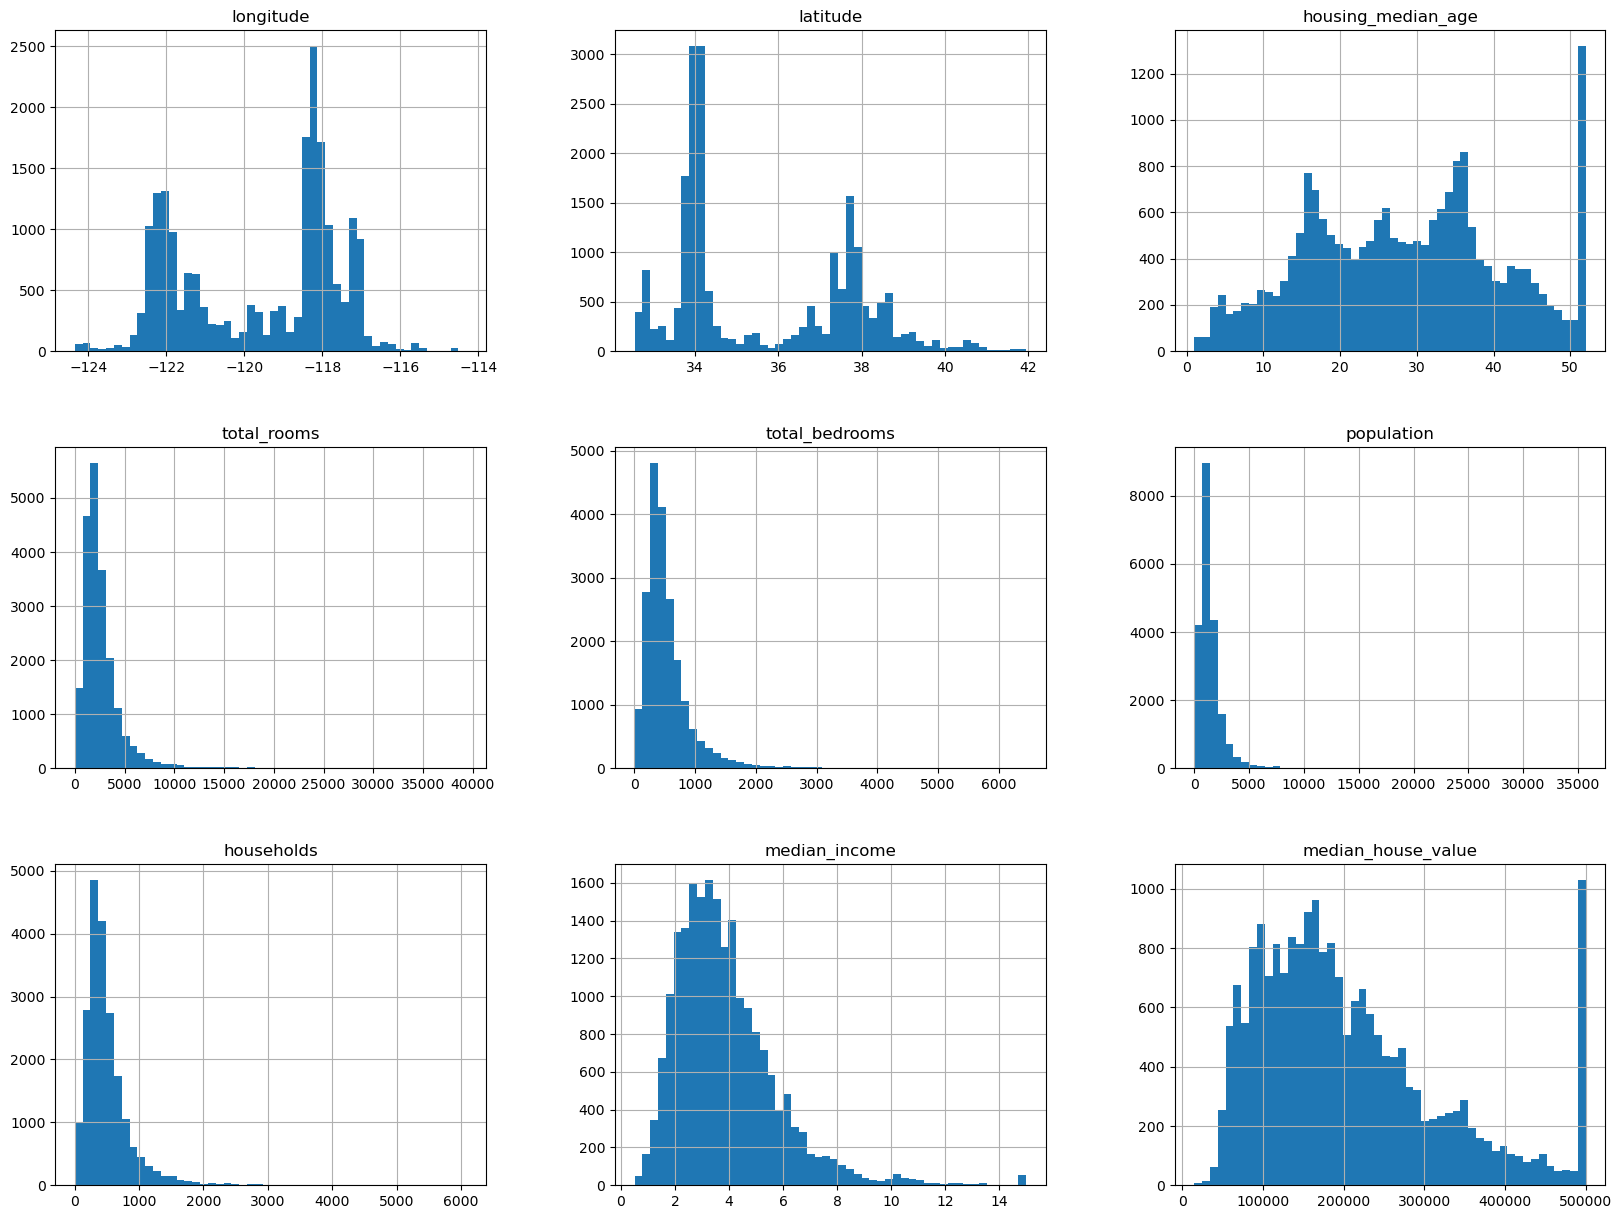

In [11]:
housing.hist(bins = 50 , figsize = (20, 15))
plt.show()

In [12]:
def split_dataset(data, test_ratio):
    suffled_indices = np.random.permutation(len(data))
    test_size = int(len(data) * test_ratio)
    training_set = suffled_indices[test_size:]
    test_set = suffled_indices[:test_size]
    
    return data.iloc[test_set] , data.iloc[training_set]

testing_set , training_set = split_dataset(housing, 0.2)

    

In [13]:
# approach one split randomly

def test_train_split(data, test_size, seed = 42):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    data = data.loc[shuffled_indices]
    size = int(len(data) * test_size)
    test_set = data[:size]
    train_set = data[size:]
    
    return train_set, test_set

train_set, test_set = test_train_split(housing, 0.2)
print(train_set.info(), test_set.info())
    
    

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64

In [14]:
# second approach is using identifiers to split the dataset

from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_dataset(data, test_ratio, id_column):
    
    ids = data[id_column]
    
    test_indices = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    
    return data.loc[~test_indices] , data.loc[test_indices]
    
    

housing_with_index = housing.reset_index()
housing_with_index['id'] = housing_with_index['latitude'] * 1000 + housing_with_index['longitude']

train_set, test_set = split_dataset(housing_with_index, 0.2, 'id')

print(train_set.info() , test_set.info())



<class 'pandas.core.frame.DataFrame'>
Index: 16695 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16695 non-null  int64  
 1   longitude           16695 non-null  float64
 2   latitude            16695 non-null  float64
 3   housing_median_age  16695 non-null  float64
 4   total_rooms         16695 non-null  float64
 5   total_bedrooms      16538 non-null  float64
 6   population          16695 non-null  float64
 7   households          16695 non-null  float64
 8   median_income       16695 non-null  float64
 9   median_house_value  16695 non-null  float64
 10  ocean_proximity     16695 non-null  object 
 11  id                  16695 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 3945 entries, 322 to 20638
Data columns (total 12 columns):
 #   Column              Non-Null Count  D

In [15]:
housing['income_cut'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1, 2, 3, 4, 5] )

<Axes: >

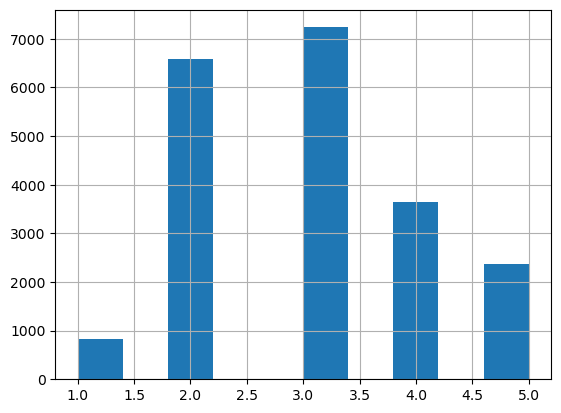

In [16]:
housing['income_cut'].hist()

In [17]:
# third approach using stratified sampling 

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, random_state = 42 , test_size = 0.2)

for train_index, test_index in split.split(housing, housing['income_cut']):
    
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]
    
test_set['income_cut'].value_counts() / len(test_set)

income_cut
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [18]:
train_set['income_cut'].value_counts() / len(train_set)

income_cut
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [19]:
for set_ in (train_set, test_set):
    set_.drop('income_cut' , inplace = True, axis = 1)

In [20]:
housing = train_set.copy()

<Axes: xlabel='latitude', ylabel='longitude'>

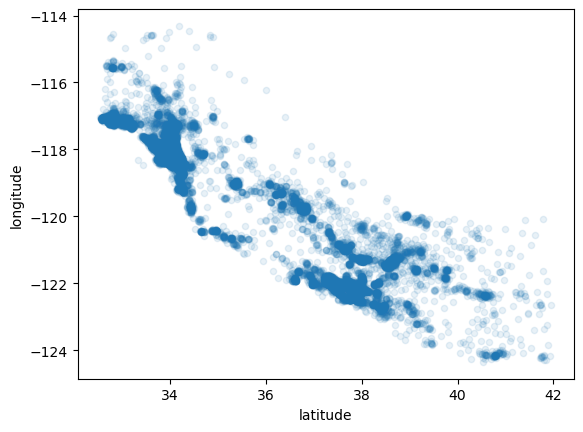

In [21]:
housing.plot(kind = 'scatter' , x = 'latitude', y = 'longitude', alpha = 0.1)

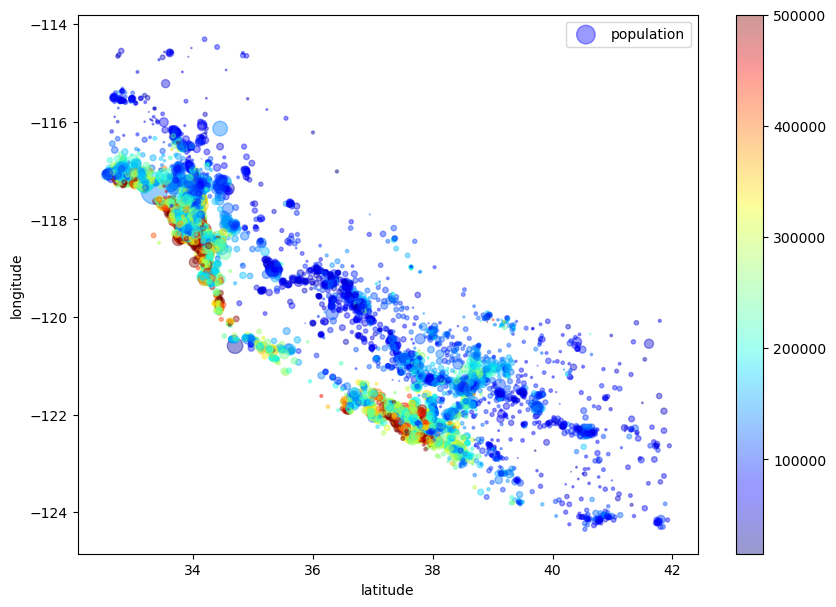

In [22]:
housing.plot(kind = 'scatter' , x = 'latitude', y = 'longitude', alpha = 0.4 ,
            s = housing['population'] / 100 , label = 'population' , c = housing['median_house_value']
            , cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7))

plt.show()

In [23]:
# looking for correlation between atrributes(columns)

housing_with_out_ocean = housing.drop('ocean_proximity' , axis = 1)

In [24]:
corr_matrix = housing_with_out_ocean.corr()

In [25]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [26]:
housing = train_set.drop('median_house_value' , axis = 1)
housing_labels = train_set['median_house_value'].copy()


## Data cleaning

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

housing_num = housing.drop('ocean_proximity', axis = 1)

imputer.fit(housing_num)

X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

housing_tr['ocean_proximity'] = housing['ocean_proximity']

In [28]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing_tr[['ocean_proximity']]

housing_cat.head(10)
encoder = OrdinalEncoder()

housing_cat_num = encoder.fit_transform(housing_cat)

encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [32]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [33]:
housing_prepared.shape

(16512, 16)

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [36]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [37]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mser = np.sqrt(lin_mse)
lin_mser

68627.87390018745

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_mser = np.sqrt(tree_mse)
tree_mser

0.0

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('scores: ', scores)
    print('mean: ', scores.mean())
    print('std: ', scores.std())

display_scores(tree_rmse_scores)


scores:  [73613.92727373 69346.77971397 68274.03292215 71337.54015533
 69677.98440945 76455.55255486 69957.90888491 72198.94273604
 67596.27072755 71071.02227311]
mean:  70952.99616511077
std:  2504.2584325065654


In [42]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)

forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

scores:  [51411.90170798 48698.82746474 46940.89880489 51576.66048119
 47457.51719311 51864.36655736 52225.29774897 49730.74136934
 48565.31016069 54143.42969444]
mean:  50261.49511826865
std:  2214.4424616287633


In [43]:
import joblib
joblib.dump(forest_reg, "my_model.pkl")

['my_model.pkl']